In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the config of the plots we are about to create

# Read in the data

df = pd.read_csv(r'C:\Users\praya\OneDrive\Desktop\Data Exploration\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Check for missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


The above analysis highlights that there are missing values within the dataset that needs to be considered. Since these are missing information, we will be deleting rows with missing dataset because we will be analyzing all the key elements moving forward by correlating gross revenue to the rest of the features.

In [5]:
# Delete null rows

df = df[df['budget'].notna()]
df = df[df['gross'].notna()]
#df = df[df['rating'].notna()]

In [6]:
# Check for missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.002207505518763797%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0001839587932303164%
budget - 0.0%
gross - 0.0%
company - 0.0003679175864606328%
runtime - 0.0001839587932303164%


In [7]:
# DataTypes within the dataset

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Basic Data Cleaning: Change datatype from float to int for budget, votes and gross for analytical purposes

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

In [9]:
# Some Years do not match, so we will create a year column from 'released' column

df['Year_correct'] = df['released'].astype(str).str[:4]

In [11]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


The table above highlights that the top two highest grossing movies in history are Avatar and Avengers: Endgame

In [13]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
633                                     NaN
Name: company, Length: 1482, dtype: object

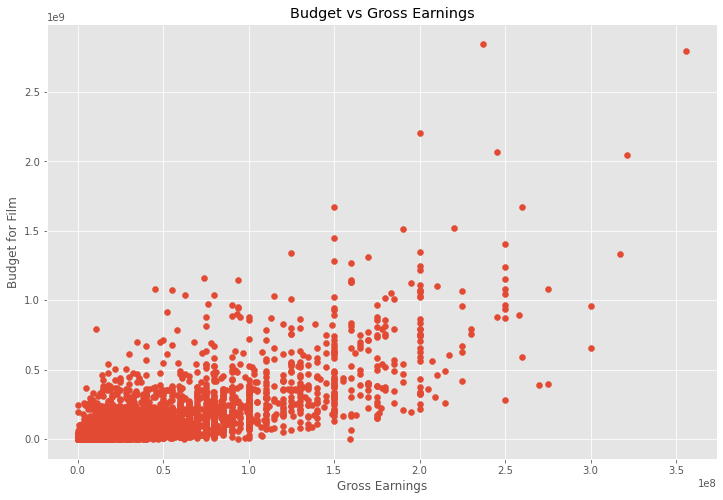

In [14]:
# Scatter Plot with Budget vs Gross 

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

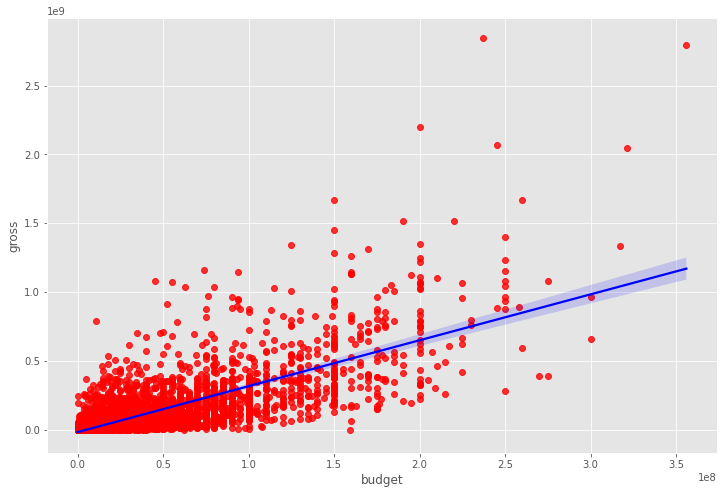

In [15]:
# Plot Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

The above graph shows a positive correlation between the budget of a movie and its total gross revenue. 

In [16]:
# Now let's look at Correlation methods

In [17]:
df.corr(method='pearson') # only works on numerical fields

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


High correlation between budget and gross

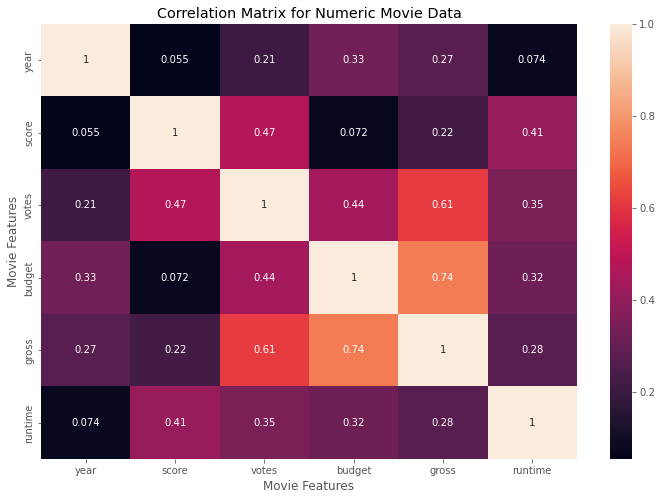

In [18]:
# We will now make the above matrix more visually appealing and easy to digest

corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Movie Data')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [19]:
# Since correlations are only numeric, we will convert object features into numerical values

df_numeric = df

for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name] = df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes

df_numeric.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_correct
0,4706,6,6,1980,1308,8.4,927000,1800,2841,700,46,19000000,46998772,1432,146.0,11
1,3943,6,1,1980,1131,5.8,65000,1581,1160,215,47,4500000,58853106,454,104.0,10
2,3654,4,0,1980,1363,8.7,1200000,759,1822,1161,47,18000000,538375067,949,124.0,11
3,205,4,4,1980,1131,7.7,221000,891,1416,1478,47,3500000,83453539,1114,88.0,10
4,734,6,4,1980,1174,7.3,108000,721,352,272,47,6000000,39846344,1089,98.0,10


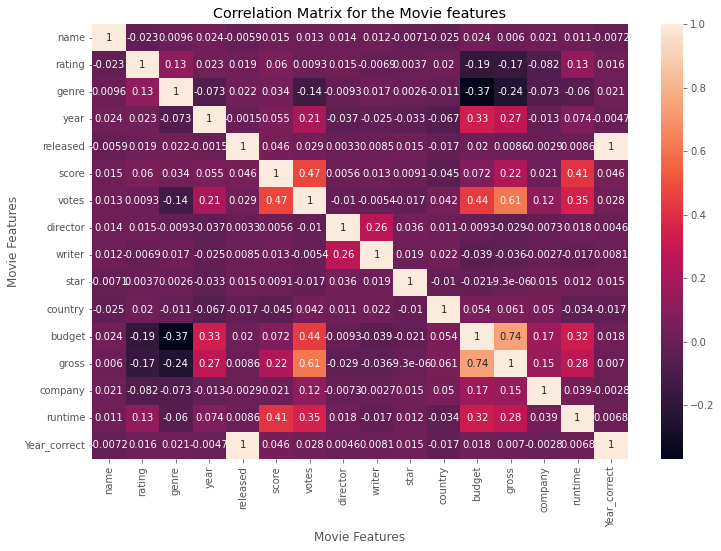

In [20]:
# Correlation Matrix for all the categories

corr_matrix = df_numeric.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for the Movie features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Looking at gross revenue, it has a strong correlation with votes and budget

In [22]:
# Look at high correlation for each category through unstack

corr_mat = df_numeric.corr()
corr_pairs = corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget        genre          -0.368900
genre         budget         -0.368900
gross         genre          -0.244380
genre         gross          -0.244380
rating        budget         -0.186892
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
Year_correct  Year_correct    1.000000
Length: 256, dtype: float64

In [23]:
# Filter for just all the correlation greater than 0.5

high_corr = sorted_pairs[(sorted_pairs > 0.5)]

high_corr

votes         gross           0.614904
gross         votes           0.614904
              budget          0.740395
budget        gross           0.740395
released      Year_correct    0.996190
Year_correct  released        0.996190
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
Year_correct  Year_correct    1.000000
dtype: float64